DATA ACQUISITION

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!kaggle datasets download -d hasnainjaved/melanoma-skin-cancer-dataset-of-10000-images

import zipfile
zip_ref = zipfile.ZipFile('/content/melanoma-skin-cancer-dataset-of-10000-images.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

DATA LOADING, AUGMENTATION, TRAIN-TEST SPLIT

In [5]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
        # Augmentation Props
    rotation_range = 50,
    width_shift_range =0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest',
    validation_split = 0.05, # (TRAIN-TEST SPLIT)
)

val_datagen = ImageDataGenerator(rescale = 1./255)

In [6]:
IMG_SIZE = (256, 256)
train = train_datagen.flow_from_directory(
    '/content/melanoma_cancer_dataset/train',
    target_size = IMG_SIZE,
    batch_size = 32,
    shuffle = True,
    class_mode = 'binary',
    subset = 'training'
)

test = train_datagen.flow_from_directory(
    '/content/melanoma_cancer_dataset/train',
    target_size = IMG_SIZE,
    class_mode = 'binary',
    subset = 'validation',
)

val = val_datagen.flow_from_directory(
    '/content/melanoma_cancer_dataset/test',
    target_size = IMG_SIZE,
    batch_size = 32,
    class_mode = 'binary',
)

Found 9125 images belonging to 2 classes.
Found 480 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


DATASET VISUALIZATION

In [7]:
import matplotlib.pyplot as plt

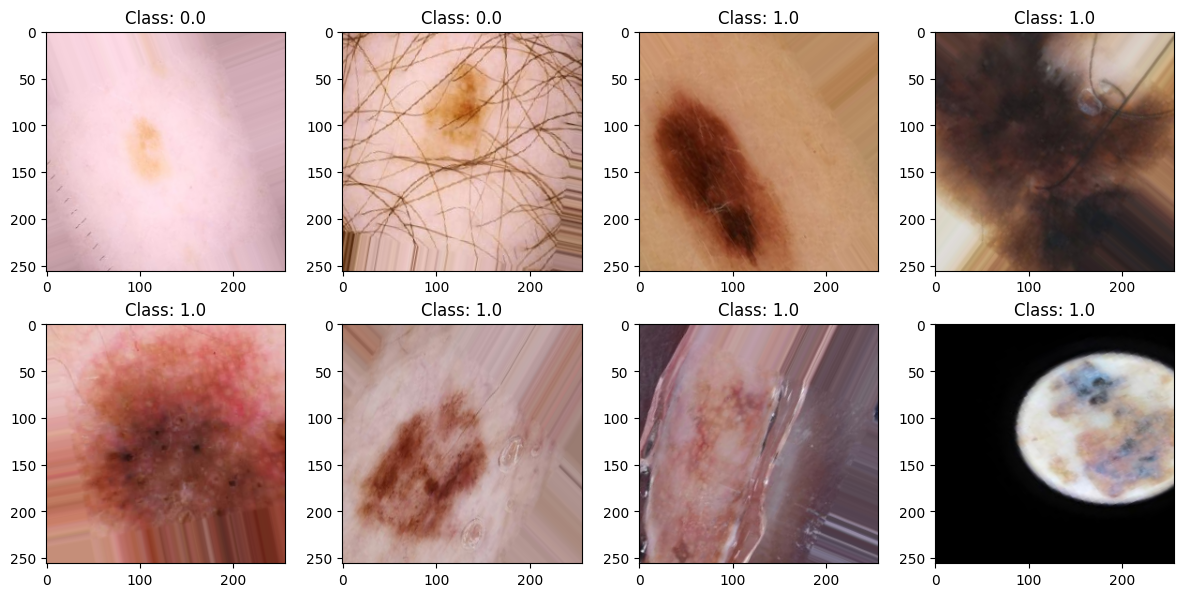

In [8]:
batch = train.next()

fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (12, 6))

for i, ax in enumerate(axes.flat):
    ax.imshow(batch[0][i])
    ax.set_title ('Class: {}'.format(batch[1][i]))

plt.tight_layout(); plt.show()

MODEL BUILDING

In [9]:
import tensorflow as tf, numpy as np, pandas as pd
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.regularizers import l2

In [10]:
model = Sequential([
    Conv2D(32, kernel_size= (3,3), activation= 'relu', input_shape=(256, 256, 3)),
    MaxPooling2D(pool_size= (2,2)),
    Conv2D(32, kernel_size= (3,3), activation= 'relu'),
    MaxPooling2D(pool_size= (2,2)),
    Conv2D(32, kernel_size= (3,3), activation= 'relu'),
    MaxPooling2D(pool_size= (2,2)),
    Conv2D(32, kernel_size= (3,3), activation= 'relu'),
    MaxPooling2D(pool_size= (2,2)),
    Conv2D(32, kernel_size= (3,3), activation= 'relu'),
    MaxPooling2D(pool_size= (2,2)),
    Conv2D(32, kernel_size= (3,3), activation= 'relu'),
    MaxPooling2D(pool_size= (2,2)),
    Flatten(),
    Dense(64, activation = 'relu'),
])

# Adding SVM Layer
model.add(
    Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01), activation= 'linear')
)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 32)        0

In [12]:
model.compile (
    optimizer = 'adam',
    loss = 'hinge',
    metrics = ['accuracy'],
)

In [13]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor = 'val_loss',
    patience= 3,
    restore_best_weights =True,
)

model.fit (
    train,
    epochs = 10,
    validation_data= val,
    batch_size = 32,
    verbose= 1,
    callbacks = [early_stopping]
)

Epoch 1/10
286/286 [==============================] - 161s 528ms/step - loss: 0.6032 - accuracy: 0.7154 - val_loss: 0.3896 - val_accuracy: 0.8310
Epoch 2/10
286/286 [==============================] - 151s 527ms/step - loss: 0.4009 - accuracy: 0.8203 - val_loss: 0.3714 - val_accuracy: 0.8470
Epoch 3/10
286/286 [==============================] - 149s 522ms/step - loss: 0.3802 - accuracy: 0.8279 - val_loss: 0.2923 - val_accuracy: 0.8830
Epoch 4/10
286/286 [==============================] - 151s 527ms/step - loss: 0.3349 - accuracy: 0.8493 - val_loss: 0.3172 - val_accuracy: 0.8860
Epoch 5/10
286/286 [==============================] - 153s 535ms/step - loss: 0.3273 - accuracy: 0.8549 - val_loss: 0.2834 - val_accuracy: 0.8980
Epoch 6/10
286/286 [==============================] - 153s 535ms/step - loss: 0.3163 - accuracy: 0.8549 - val_loss: 0.2593 - val_accuracy: 0.8860
Epoch 7/10
286/286 [==============================] - 151s 527ms/step - loss: 0.3194 - accuracy: 0.8551 - val_loss: 0.2684 -